In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
import os

from numba import jit
import numpy
import matplotlib.pyplot as pyplot
import seaborn
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

data_abb = pd.read_csv('ABB_ML_ready.csv')
data_abb.head()

,Unnamed: 0,price,minimum_nights,availability_365,number_of_reviews,neighbourhood_cleansed_Acton,neighbourhood_cleansed_Adams-Normandie,neighbourhood_cleansed_Agoura Hills,neighbourhood_cleansed_Agua Dulce,neighbourhood_cleansed_Alhambra,...,neighbourhood_cleansed_Westwood,neighbourhood_cleansed_Whittier,neighbourhood_cleansed_Willowbrook,neighbourhood_cleansed_Wilmington,neighbourhood_cleansed_Windsor Square,neighbourhood_cleansed_Winnetka,neighbourhood_cleansed_Woodland Hills,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,0,3000,1,352,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,50,1,350,33,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,55,1,348,14,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,150,1,87,22,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,4,30,1,0,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [2]:
test_score = []
def get_r_squared(max_neighbors=7, samples=100):
    train_score = []
   
    models = []
    inputs, values = make_regression(n_samples=samples)
    X_train, X_test, y_train, y_test = train_test_split(inputs, values)

    for neighbors in range(1, max_neighbors+1):
        model = KNeighborsRegressor(n_neighbors=neighbors)
        model.fit(X_train, y_train)
        train_score.append(model.score(X_train, y_train))
        test_score.append(model.score(X_test, y_test))
        models.append(model)
    return train_score, test_score, models


([1.0,
  0.6898758231348434,
  0.5091370439205762,
  0.4889763057783918,
  0.42071072989987746,
  0.38833902921703506,
  0.38386338463183545,
  0.37891297896828185,
  0.3370341091733732,
  0.337612600898209,
  0.32100500004346155,
  0.30780605985721166,
  0.3030726319075402,
  0.2829794281186484,
  0.27140341134993073,
  0.27473092832859713,
  0.272590315862799,
  0.28836759860729444,
  0.283848800259077,
  0.28248717906218856],
 [-0.7412492674742142,
  -0.3852521797437656,
  -0.45170634060774484,
  -0.3181400880272811,
  -0.030565712719649696,
  -0.031774793644900434,
  0.0683046930210155,
  0.030972780524086696,
  -0.043674554263232856,
  -0.06322435337259624,
  -0.04297361469381067,
  -0.060786390280973324,
  -0.12052270068334758,
  -0.20786203796895217,
  -0.21977992927411472,
  -0.2607879551809573,
  -0.17080077181554532,
  -0.15661250223748135,
  -0.14893163885492844,
  -0.14685569157561917],
 [KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
              

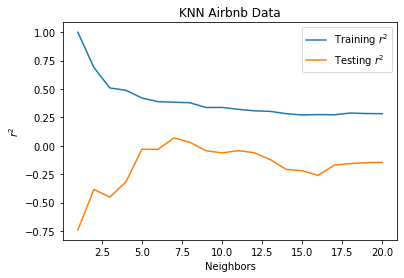

In [3]:
def plot_r_squared(neighbors=20, samples=100):
    train_score, test_score, models = get_r_squared(neighbors, samples)
    neighbors = range(1, neighbors+1)
    pyplot.plot(neighbors, train_score, label="Training $r^2$")
    pyplot.plot(neighbors, test_score, label="Testing $r^2$")
    pyplot.xlabel("Neighbors")
    pyplot.ylabel("$r^2$")
    pyplot.title("KNN Airbnb Data")
    pyplot.legend()
    return train_score, test_score, models
plot_r_squared()

In [4]:
print("Max r2: {:.2f}".format(max(test_score)))

Max r2: 0.07


In [5]:
X = data_abb.drop('price', axis=1)

y = data_abb['price']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
knn = KNeighborsRegressor(n_neighbors=11)
knn.fit(X_train, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test, y_test))

k=13 Test Acc: 0.129
